In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb # lightgbm model
from xgboost import XGBClassifier  # xgb model
from sklearn.model_selection import RandomizedSearchCV  # hyperparameters tune
import warnings as w
w.filterwarnings('ignore')

In [105]:
pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.4 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [107]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/124.9 MB 3.4 MB/s eta 0:00:37
    --------------------------------------- 1.6/124.9 MB 3.7 MB/s eta 0:00:34
    --------------------------------------- 2.4/124.9 MB 3.3 MB/s eta 0:00:38
    --------------------------------------- 2.6/124.9 MB 3.3 MB/s eta 0:00:38
   - -------------------------------------- 3.1/124.9 MB 2.6 MB/s eta 0:00:47
   - -------------------------------------- 3.4/124.9 MB 2.5 MB/s eta 0:00:48
   - -------------------------------------- 3.7/124.9 MB 2.5 MB/s eta 0:00:49
   - -------------------------------------- 3.9/124.9 MB 2.2 MB/s eta 0:00:55
   - -------------------------------------- 5.0/124.9 MB 2.4 MB/s eta 0:00:51
   - -------------------------------------- 5.8/124.9 MB 2.6 MB/s eta 0:00:46
   -- ------------------------------------- 6.8/124.9 MB 2.7 MB/s eta 0:00:44


In [3]:
df = pd.read_csv("Hotel Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
df.shape

(36275, 19)

In [7]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [11]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [13]:
df.duplicated().sum()

0

In [15]:
df.drop('Booking_ID', axis=1, inplace=True)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# EDA

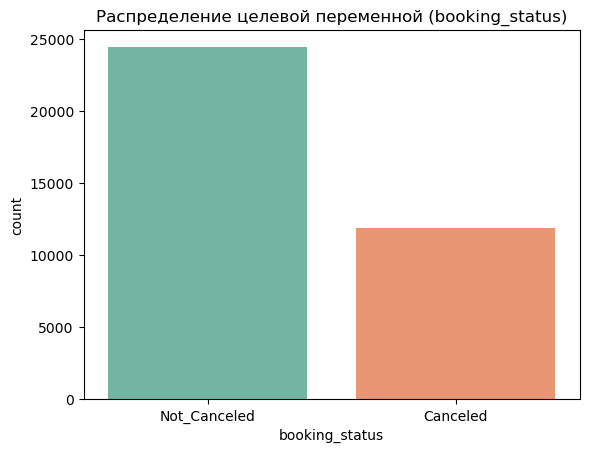

In [18]:
sns.countplot(data=df, x='booking_status', palette='Set2')
plt.title('Распределение целевой переменной (booking_status)')
plt.show()

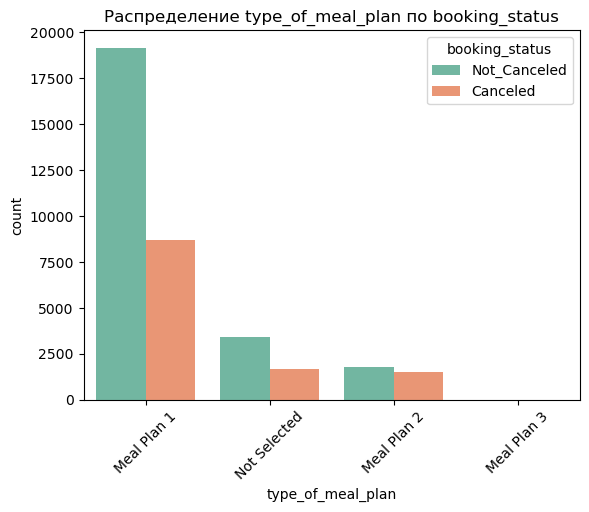

In [19]:
sns.countplot(data=df, x='type_of_meal_plan', hue='booking_status', palette='Set2')
plt.title('Распределение type_of_meal_plan по booking_status')
plt.xticks(rotation=45)
plt.show()

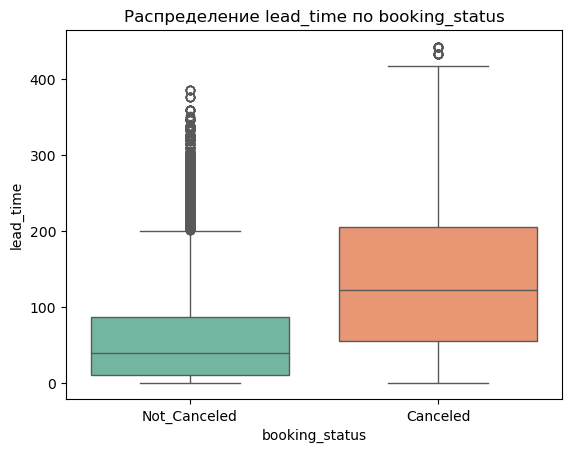

In [21]:
sns.boxplot(data=df, x='booking_status', y='lead_time', palette='Set2')
plt.title('Распределение lead_time по booking_status')
plt.show()

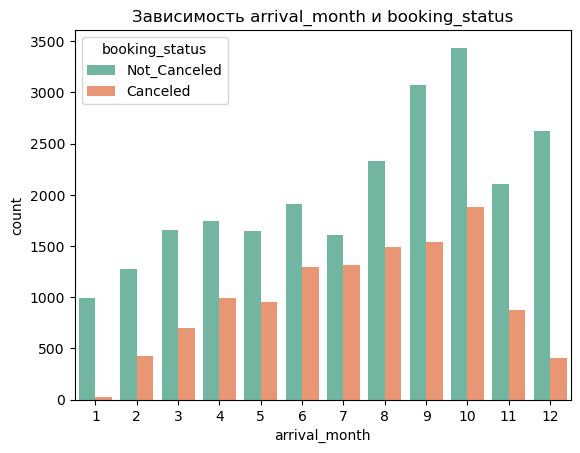

In [23]:
sns.countplot(data=df, x='arrival_month', hue='booking_status', palette='Set2')
plt.title('Зависимость arrival_month и booking_status')
plt.show()

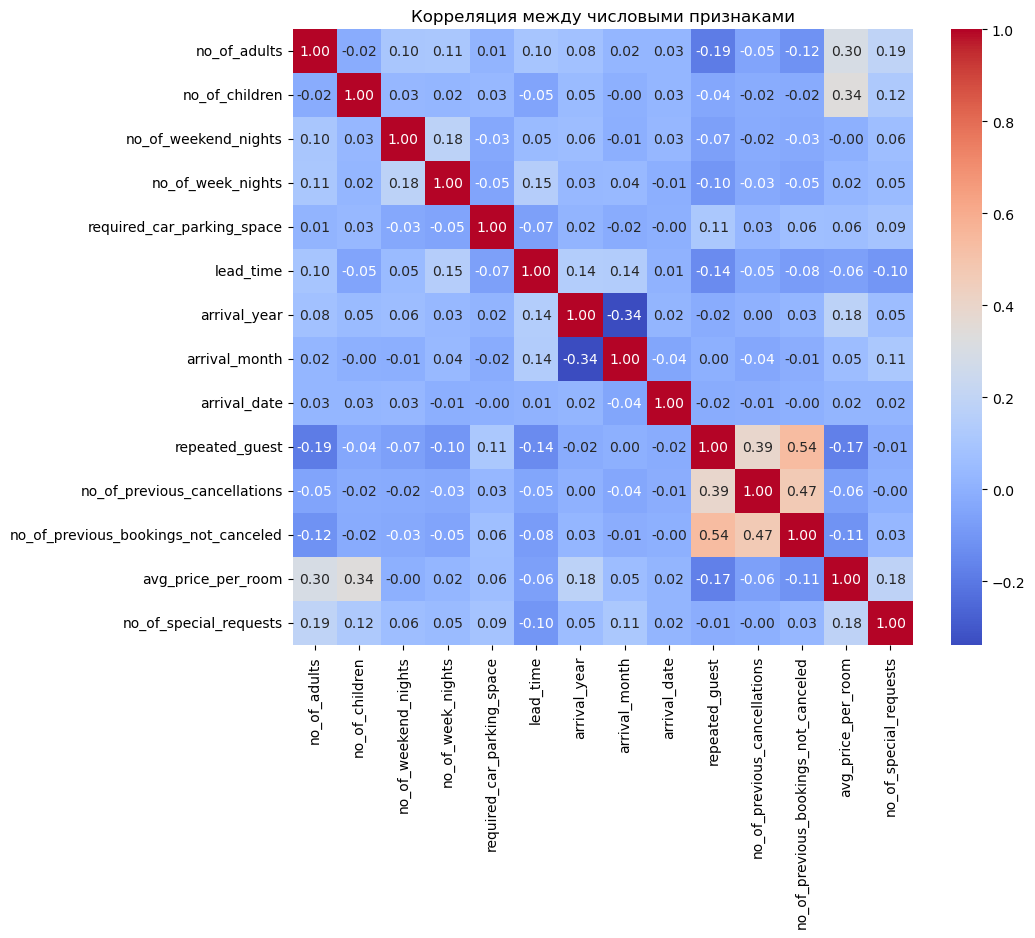

In [25]:
# Выбираем только числовые столбцы
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между числовыми признаками')
plt.show()


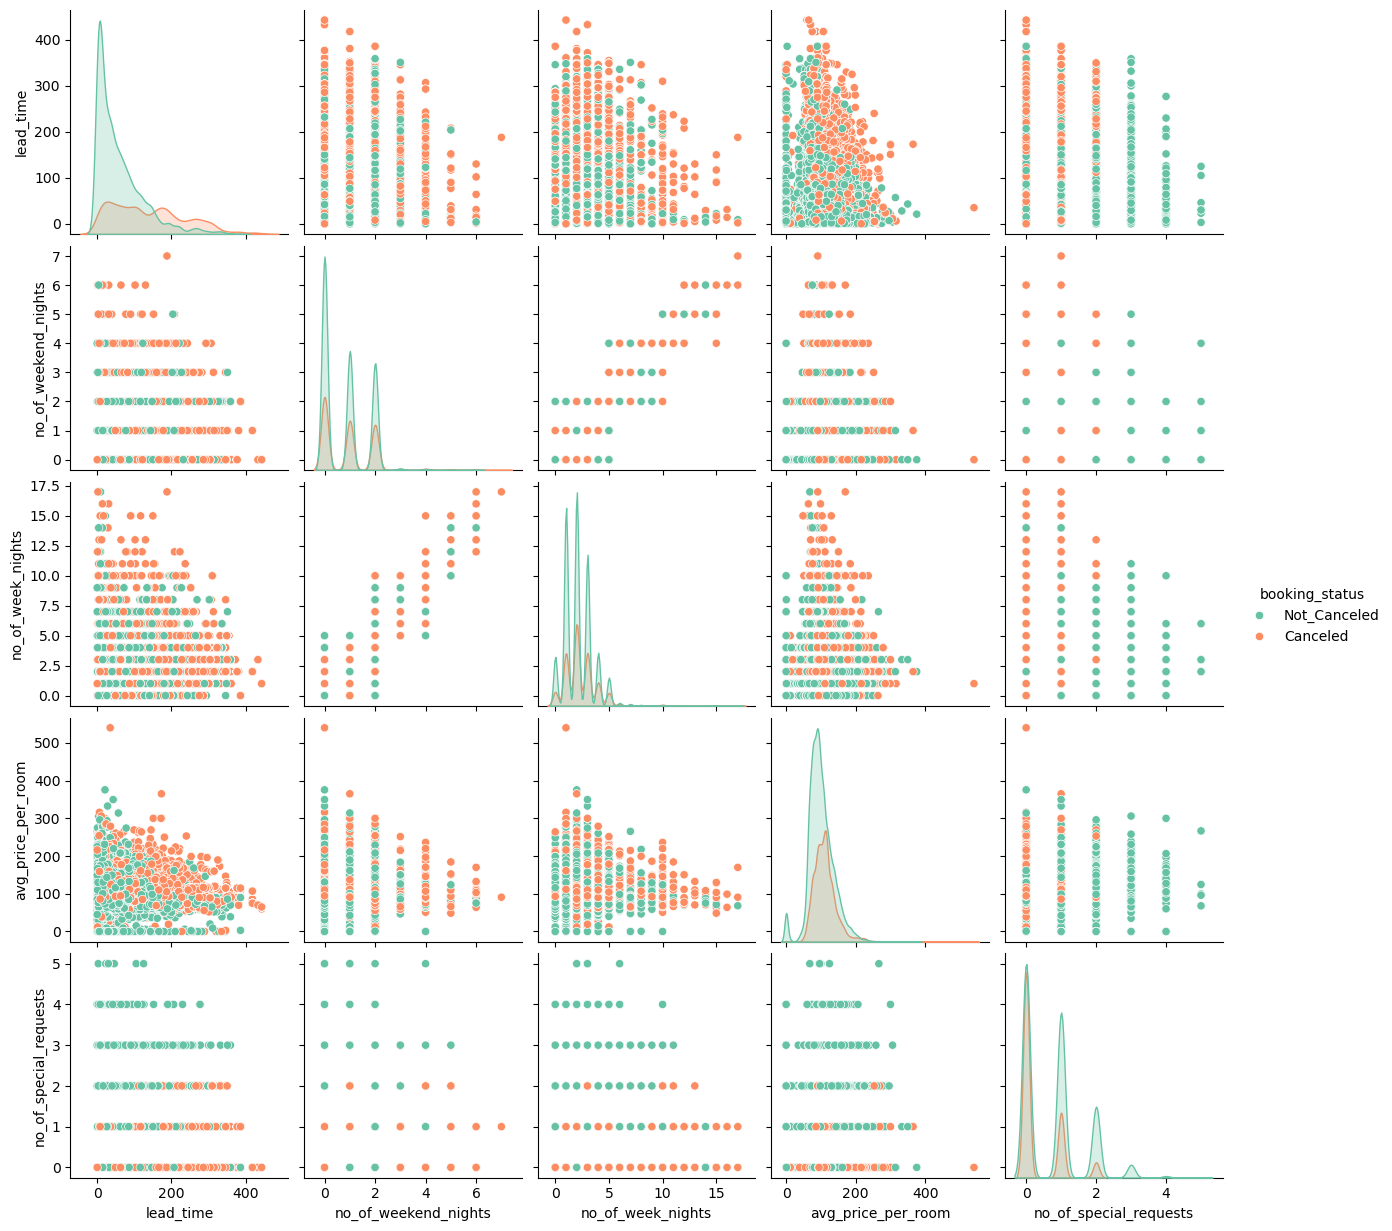

In [26]:
# Для упрощения выбираем числовые признаки и целевую переменную
selected_cols = ['lead_time', 'no_of_weekend_nights', 'no_of_week_nights', 
                 'avg_price_per_room', 'no_of_special_requests', 'booking_status']

sns.pairplot(df[selected_cols], hue='booking_status', palette='Set2')
plt.show()

# Data Preproccesing

In [29]:
label_encoder = LabelEncoder()
df['room_type_reserved'] = label_encoder.fit_transform(df['room_type_reserved'])
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,0,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,0,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,0,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,0,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,0,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [31]:
df = pd.get_dummies(df, columns=['type_of_meal_plan', 'market_segment_type', 'booking_status'], drop_first=True)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,...,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled
0,2,0,1,2,0,0,224,2017,10,2,...,65.00,0,False,False,False,False,False,True,False,True
1,2,0,2,3,0,0,5,2018,11,6,...,106.68,1,False,False,True,False,False,False,True,True
2,1,0,2,1,0,0,1,2018,2,28,...,60.00,0,False,False,False,False,False,False,True,False
3,2,0,0,2,0,0,211,2018,5,20,...,100.00,0,False,False,False,False,False,False,True,False
4,2,0,1,1,0,0,48,2018,4,11,...,94.50,0,False,False,True,False,False,False,True,False


In [32]:
df = df.astype(int)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,...,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled
0,2,0,1,2,0,0,224,2017,10,2,...,65,0,0,0,0,0,0,1,0,1
1,2,0,2,3,0,0,5,2018,11,6,...,106,1,0,0,1,0,0,0,1,1
2,1,0,2,1,0,0,1,2018,2,28,...,60,0,0,0,0,0,0,0,1,0
3,2,0,0,2,0,0,211,2018,5,20,...,100,0,0,0,0,0,0,0,1,0
4,2,0,1,1,0,0,48,2018,4,11,...,94,0,0,0,1,0,0,0,1,0


In [33]:
df = df[df['avg_price_per_room'] <= 400]
df = df[df['lead_time'] <= 300]
df = df[df['no_of_children'] <= 3]

In [34]:
X=df.drop('booking_status_Not_Canceled',axis=1)
y=df['booking_status_Not_Canceled']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
scaler=StandardScaler()
scaler.fit(X_train,y_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [37]:
RF=RandomForestClassifier()

In [38]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
y_pred_RF=RF.predict(X_test)
y_pred_DT=DT.predict(X_test)

In [41]:
print(confusion_matrix(y_test,y_pred_DT))
print()
print(classification_report(y_test,y_pred_DT))

[[1649  488]
 [ 494 4399]]

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2137
           1       0.90      0.90      0.90      4893

    accuracy                           0.86      7030
   macro avg       0.83      0.84      0.84      7030
weighted avg       0.86      0.86      0.86      7030



In [42]:
print(confusion_matrix(y_test,y_pred_RF))
print()
print(classification_report(y_test,y_pred_RF))

[[1684  453]
 [ 247 4646]]

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      2137
           1       0.91      0.95      0.93      4893

    accuracy                           0.90      7030
   macro avg       0.89      0.87      0.88      7030
weighted avg       0.90      0.90      0.90      7030



In [43]:
log = LogisticRegression()

In [44]:
log.fit(X_train,y_train)

LogisticRegression()

In [45]:
y_pred_log=log.predict(X_test)

In [46]:
print(confusion_matrix(y_test,y_pred_log))
print()
print(classification_report(y_test,y_pred_log))

[[1257  880]
 [ 476 4417]]

              precision    recall  f1-score   support

           0       0.73      0.59      0.65      2137
           1       0.83      0.90      0.87      4893

    accuracy                           0.81      7030
   macro avg       0.78      0.75      0.76      7030
weighted avg       0.80      0.81      0.80      7030



In [47]:
gr = GradientBoostingClassifier()
ad = AdaBoostClassifier()
ex = ExtraTreesClassifier()

In [48]:
gr.fit(X_train,y_train)
ad.fit(X_train,y_train)
ex.fit(X_train,y_train)

ExtraTreesClassifier()

In [49]:
y_pred_gr=gr.predict(X_test)
y_pred_ad=ad.predict(X_test)
y_pred_ex=ex.predict(X_test)

In [50]:
print(confusion_matrix(y_test,y_pred_gr))
print()
print(classification_report(y_test,y_pred_gr))

[[1375  762]
 [ 313 4580]]

              precision    recall  f1-score   support

           0       0.81      0.64      0.72      2137
           1       0.86      0.94      0.89      4893

    accuracy                           0.85      7030
   macro avg       0.84      0.79      0.81      7030
weighted avg       0.84      0.85      0.84      7030



In [51]:
print(confusion_matrix(y_test,y_pred_ad))
print()
print(classification_report(y_test,y_pred_ad))

[[1379  758]
 [ 521 4372]]

              precision    recall  f1-score   support

           0       0.73      0.65      0.68      2137
           1       0.85      0.89      0.87      4893

    accuracy                           0.82      7030
   macro avg       0.79      0.77      0.78      7030
weighted avg       0.81      0.82      0.81      7030



In [52]:
print(confusion_matrix(y_test,y_pred_ex))
print()
print(classification_report(y_test,y_pred_ex))

[[1680  457]
 [ 309 4584]]

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      2137
           1       0.91      0.94      0.92      4893

    accuracy                           0.89      7030
   macro avg       0.88      0.86      0.87      7030
weighted avg       0.89      0.89      0.89      7030



In [53]:
lg = lgb.LGBMClassifier()

In [54]:
xb = XGBClassifier()

In [55]:
lg.fit(X_train,y_train)
xb.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 19285, number of negative: 8832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 28117, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.685884 -> initscore=0.780946
[LightGBM] [Info] Start training from score 0.780946


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
y_pred_lg=lg.predict(X_test)
y_pred_xb=xb.predict(X_test)

In [57]:
print(confusion_matrix(y_test,y_pred_lg))
print()
print(classification_report(y_test,y_pred_lg))

[[1607  530]
 [ 278 4615]]

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      2137
           1       0.90      0.94      0.92      4893

    accuracy                           0.89      7030
   macro avg       0.87      0.85      0.86      7030
weighted avg       0.88      0.89      0.88      7030



In [58]:
print(confusion_matrix(y_test,y_pred_xb))
print()
print(classification_report(y_test,y_pred_xb))

[[1634  503]
 [ 279 4614]]

              precision    recall  f1-score   support

           0       0.85      0.76      0.81      2137
           1       0.90      0.94      0.92      4893

    accuracy                           0.89      7030
   macro avg       0.88      0.85      0.86      7030
weighted avg       0.89      0.89      0.89      7030



In [59]:
param_dist_rf = {
    'n_estimators': np.arange(100, 500, 50),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 11, 1),
    'min_samples_leaf': np.arange(1, 11, 1),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state = 42)

rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = param_dist_rf, cv = 5, n_jobs = -1,\
                              scoring = 'accuracy', n_iter = 10, random_state = 42)
rf_random.fit(X_train, y_train)

print(f'Best Parameters: {rf_random.best_params_}')
print(f'Best Score: {rf_random.best_score_}')

Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best Score: 0.8919869470263997


In [60]:
best_RF = RandomForestClassifier(
    n_estimators=300,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=None,
    bootstrap=True,
    random_state=42
)

# Обучение модели
best_RF.fit(X_train, y_train)

# Оценка модели
y_pred_best_RF = best_RF.predict(X_test)

print(confusion_matrix(y_test, y_pred_best_RF))
print(classification_report(y_test, y_pred_best_RF))


[[1606  531]
 [ 225 4668]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      2137
           1       0.90      0.95      0.93      4893

    accuracy                           0.89      7030
   macro avg       0.89      0.85      0.87      7030
weighted avg       0.89      0.89      0.89      7030



In [98]:
# Пример тестирования на реальных данных
real_example = {
    'no_of_adults': 2,
    'no_of_children': 1,
    'no_of_weekend_nights': 2,
    'no_of_week_nights': 3,
    'type_of_meal_plan': 'Meal Plan 1',
    'required_car_parking_space': 0,
    'room_type_reserved': 'Room_Type 1',
    'lead_time': 45,
    'arrival_year': 2023,
    'arrival_month': 12,
    'arrival_date': 25,
    'market_segment_type': 'Online',
    'repeated_guest': 0,
    'no_of_previous_cancellations': 0,
    'no_of_previous_bookings_not_canceled': 1,
    'avg_price_per_room': 120.50,
    'no_of_special_requests': 1
}

# Преобразуем пример в формат DataFrame
real_example_df = pd.DataFrame([real_example])

# Преобразуем категориальные значения примера
for column in categorical_columns:  # Используем список категориальных столбцов
    if column in real_example_df.columns:
        real_example_df[column] = label_encoder[column].transform(real_example_df[column])

# Предсказание
prediction = best_RF.predict(real_example_df)
readable_prediction = label_encoder['booking_status'].inverse_transform(prediction)

print("\nПредсказание для реального примера:")
print("Статус бронирования:", readable_prediction[0])


NameError: name 'categorical_columns' is not defined